In [86]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [87]:
train = pd.read_excel("C:/Users/HP/Documents/praxis/Projects/Data_Train.xlsx")
test = pd.read_excel("C:/Users/HP/Documents/praxis/Projects/Test_set.xlsx")

## Data Description

We are provided with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities. <br>
**Size of training set:** 10683 records <br>
**Size of test set:** 2671 records <br>
FEATURES: <br>
Airline: The name of the airline. <br>
Date_of_Journey: The date of the journey <br>
Source: The source from which the service begins. <br>
Destination: The destination where the service ends. <br>
Route: The route taken by the flight to reach the destination. <br>
Dep_Time: The time when the journey starts from the source. <br>
Arrival_Time: Time of arrival at the destination. <br>
Duration: Total duration of the flight. <br>
Total_Stops: Total stops between the source and destination <br>
Additional_Info: Additional information about the flight <br>
Price: The price of the ticket

In [88]:
train.shape

(10683, 11)

In [89]:
test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [90]:
train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [91]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


## Data Preprocessing

In [92]:
train.nunique()

Airline              12
Date_of_Journey      44
Source                5
Destination           6
Route               128
Dep_Time            222
Arrival_Time       1343
Duration            368
Total_Stops           5
Additional_Info      10
Price              1870
dtype: int64

### Date Column

In [93]:
train['Date_of_Journey'] = train['Date_of_Journey'].str.split('/')
train['Date'] = train['Date_of_Journey'].str[0]
train['Month'] = train['Date_of_Journey'].str[1]
train['Year'] = train['Date_of_Journey'].str[2]

In [94]:
for i in train['Date'].unique():
    print(i)

24
1
9
12
01
27
18
3
15
6
21
06
09
03


In [95]:
# Some of the same dates have different values. replacing them with a single value
train['Date'] = train['Date'].replace('01', '1')
train['Date'] = train['Date'].replace('09', '9')
train['Date'] = train['Date'].replace('03', '3')
train['Date'] = train['Date'].replace('06', '6')

In [96]:
test['Date_of_Journey'] = test['Date_of_Journey'].str.split('/')
test['Date'] = test['Date_of_Journey'].str[0]
test['Month'] = test['Date_of_Journey'].str[1]
test['Year'] = test['Date_of_Journey'].str[2]

In [97]:
test['Date'] = test['Date'].replace('01', '1')
test['Date'] = test['Date'].replace('09', '9')
test['Date'] = test['Date'].replace('03', '3')
test['Date'] = test['Date'].replace('06', '6')

### Source and Destination

In [98]:
train['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [99]:
train['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

### Departure Time and Arrival Time

Here I have split the departure time into categories such as midnight, morning, afternoon and evening to see how each period of the day affect the flight prices.

In [100]:
#print(train['Dep_Time'].value_counts().head(20))

In [101]:
# For the train data
train['Dep_Time'] = pd.to_datetime(train['Dep_Time'])

# Extract the numerical values from time objects
train['Dep_Time_Nu'] = train['Dep_Time'].dt.hour * 60 + train['Dep_Time'].dt.minute

# Define time ranges for each category
midnight_start = 0
midnight_end = 359
morning_start = 360
morning_end = 719
afternoon_start = 720
afternoon_end = 1079
evening_start = 1080
evening_end = 1439


train['Dep_Period'] = pd.cut(
    train['Dep_Time_Nu'],
    bins=[midnight_start, morning_start, afternoon_start, evening_start, evening_end],
    labels=['Midnight', 'Morning', 'Afternoon', 'Evening'],
    right=False
)



In [102]:
# For the test data
test['Dep_Time'] = pd.to_datetime(test['Dep_Time'])

# Extract the numerical values from time objects
test['Dep_Time_Nu'] = test['Dep_Time'].dt.hour * 60 + test['Dep_Time'].dt.minute

# Define time ranges for each category
midnight_start = 0
midnight_end = 359
morning_start = 360
morning_end = 719
afternoon_start = 720
afternoon_end = 1079
evening_start = 1080
evening_end = 1439


test['Dep_Period'] = pd.cut(
    test['Dep_Time_Nu'],
    bins=[midnight_start, morning_start, afternoon_start, evening_start, evening_end],
    labels=['Midnight', 'Morning', 'Afternoon', 'Evening'],
    right=False
)



In [103]:
# For the train data
train['Arrival_Time'] = pd.to_datetime(train['Arrival_Time'])

# Extract the numerical values from time objects
train['Arrival_Time_Nu'] = train['Arrival_Time'].dt.hour * 60 + train['Arrival_Time'].dt.minute

# Define time ranges for each category
midnight_start = 0
midnight_end = 359
morning_start = 360
morning_end = 719
afternoon_start = 720
afternoon_end = 1079
evening_start = 1080
evening_end = 1439


train['Arrival_Period'] = pd.cut(
    train['Arrival_Time_Nu'],
    bins=[midnight_start, morning_start, afternoon_start, evening_start, evening_end],
    labels=['Midnight', 'Morning', 'Afternoon', 'Evening'],
    right=False
)



In [104]:
# For the test data
test['Arrival_Time'] = pd.to_datetime(test['Arrival_Time'])

# Extract the numerical values from time objects
test['Arrival_Time_Nu'] = test['Arrival_Time'].dt.hour * 60 + test['Arrival_Time'].dt.minute

# Define time ranges for each category
midnight_start = 0
midnight_end = 359
morning_start = 360
morning_end = 719
afternoon_start = 720
afternoon_end = 1079
evening_start = 1080
evening_end = 1439


test['Arrival_Period'] = pd.cut(
    test['Arrival_Time_Nu'],
    bins=[midnight_start, morning_start, afternoon_start, evening_start, evening_end],
    labels=['Midnight', 'Morning', 'Afternoon', 'Evening'],
    right=False
)



In [105]:
train.dtypes

Airline                    object
Date_of_Journey            object
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
Date                       object
Month                      object
Year                       object
Dep_Time_Nu                 int64
Dep_Period               category
Arrival_Time_Nu             int64
Arrival_Period           category
dtype: object

### Duration

Here I have extracted the duration value and converted into minutes for ease of use.

In [106]:
train['Duration'] = train['Duration'].astype(str)
train['Duration'] = train['Duration'].str.replace('h', '')
train['Duration'] = train['Duration'].str.replace('m', '')

# Split the 'Duration' values into hours and minutes
duration_split = train['Duration'].str.split(' ', expand=True)
hours = duration_split[0].astype(float)
minutes = duration_split[1].astype(float).fillna(0)

# Convert the 'Duration' values to minutes
train['Duration'] = hours * 60 + minutes

In [107]:
test['Duration'] = test['Duration'].astype(str)
test['Duration'] = test['Duration'].str.replace('h', '')
test['Duration'] = test['Duration'].str.replace('m', '')

# Split the 'Duration' values into hours and minutes
duration_split = test['Duration'].str.split(' ', expand=True)
hours = duration_split[0].astype(float)
minutes = duration_split[1].astype(float).fillna(0)

# Convert the 'Duration' values to minutes
test['Duration'] = hours * 60 + minutes

### Total Stops

In [108]:
train['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [109]:
train['Total_Stops'].replace('non-stop','0',inplace=True)
train['Total_Stops'] = train['Total_Stops'].str.split(' ')
train['Total_Stops'] = train['Total_Stops'].str[0]

In [110]:
test['Total_Stops'].replace('non-stop','0',inplace=True)
test['Total_Stops'] = test['Total_Stops'].str.split(' ')
test['Total_Stops'] = test['Total_Stops'].str[0]

### Additional Info

In [111]:
train['Additional_Info'].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [112]:
train['Additional_Info'].replace('No Info', 'No info', inplace=True)

In [113]:
test['Additional_Info'].replace('No Info', 'No info', inplace=True)

In [114]:
train.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
Date               0
Month              0
Year               0
Dep_Time_Nu        0
Dep_Period         0
Arrival_Time_Nu    0
Arrival_Period     0
dtype: int64

In [115]:
train.dtypes

Airline                    object
Date_of_Journey            object
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                  float64
Total_Stops                object
Additional_Info            object
Price                       int64
Date                       object
Month                      object
Year                       object
Dep_Time_Nu                 int64
Dep_Period               category
Arrival_Time_Nu             int64
Arrival_Period           category
dtype: object

### Removing unwanted columns

In [116]:
train = train.drop(['Date_of_Journey', 'Route', 'Dep_Time', 'Arrival_Time', 'Dep_Time_Nu', 'Arrival_Time_Nu'], axis=1)

In [117]:
test = test.drop(['Date_of_Journey', 'Route', 'Dep_Time', 'Arrival_Time', 'Dep_Time_Nu', 'Arrival_Time_Nu'], axis=1)

In [118]:
duplicates = train[train.duplicated()]
duplicates.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Dep_Period,Arrival_Period
524,Jet Airways,Banglore,New Delhi,435.0,1,In-flight meal not included,7832,21,03,2019,Morning,Afternoon
683,Jet Airways,Delhi,Cochin,830.0,2,No info,13376,1,06,2019,Afternoon,Midnight
1061,Air India,Delhi,Cochin,1275.0,2,No info,10231,21,05,2019,Evening,Evening
1242,IndiGo,Mumbai,Hyderabad,85.0,0,No info,2754,15,03,2019,Evening,Evening
1348,Air India,Delhi,Cochin,1560.0,2,No info,12392,18,05,2019,Afternoon,Evening


In [119]:
duplicates = test[test.duplicated()]
duplicates.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Date,Month,Year,Dep_Period,Arrival_Period
294,Jet Airways,Delhi,Cochin,1375.0,2,No info,12,06,2019,Midnight,Midnight
588,IndiGo,Banglore,New Delhi,170.0,0,No info,3,03,2019,Evening,Midnight
730,Vistara,Banglore,Delhi,170.0,0,No info,18,05,2019,Morning,Afternoon
794,Jet Airways,Delhi,Cochin,1375.0,2,In-flight meal not included,12,06,2019,Midnight,Midnight
854,SpiceJet,Kolkata,Banglore,435.0,1,No info,1,04,2019,Morning,Evening


In [120]:
train = train.drop([524, 683, 1061, 1242, 1348])

In [121]:
train

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Dep_Period,Arrival_Period
0,IndiGo,Banglore,New Delhi,170.0,0,No info,3897,24,03,2019,Evening,Midnight
1,Air India,Kolkata,Banglore,445.0,2,No info,7662,1,05,2019,Midnight,Afternoon
2,Jet Airways,Delhi,Cochin,1140.0,2,No info,13882,9,06,2019,Morning,Midnight
3,IndiGo,Kolkata,Banglore,325.0,1,No info,6218,12,05,2019,Evening,Evening
4,IndiGo,Banglore,New Delhi,285.0,1,No info,13302,1,03,2019,Afternoon,Evening
...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,150.0,0,No info,4107,9,04,2019,Evening,Evening
10679,Air India,Kolkata,Banglore,155.0,0,No info,4145,27,04,2019,Evening,Evening
10680,Jet Airways,Banglore,Delhi,180.0,0,No info,7229,27,04,2019,Morning,Morning
10681,Vistara,Banglore,New Delhi,160.0,0,No info,12648,1,03,2019,Morning,Afternoon


In [122]:
test

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Date,Month,Year,Dep_Period,Arrival_Period
0,Jet Airways,Delhi,Cochin,655.0,1,No info,6,06,2019,Afternoon,Midnight
1,IndiGo,Kolkata,Banglore,240.0,1,No info,12,05,2019,Morning,Morning
2,Jet Airways,Delhi,Cochin,1425.0,1,In-flight meal not included,21,05,2019,Evening,Evening
3,Multiple carriers,Delhi,Cochin,780.0,1,No info,21,05,2019,Morning,Evening
4,Air Asia,Banglore,Delhi,170.0,0,No info,24,06,2019,Evening,Midnight
...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,Kolkata,Banglore,1435.0,1,No info,6,06,2019,Evening,Evening
2667,IndiGo,Kolkata,Banglore,155.0,0,No info,27,03,2019,Afternoon,Afternoon
2668,Jet Airways,Delhi,Cochin,395.0,1,No info,6,03,2019,Evening,Midnight
2669,Air India,Delhi,Cochin,915.0,1,No info,6,03,2019,Midnight,Evening


In [123]:
train.dtypes

Airline              object
Source               object
Destination          object
Duration            float64
Total_Stops          object
Additional_Info      object
Price                 int64
Date                 object
Month                object
Year                 object
Dep_Period         category
Arrival_Period     category
dtype: object

### Removing missing values

In [124]:
train.isna().sum()

Airline            0
Source             0
Destination        0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
Date               0
Month              0
Year               0
Dep_Period         0
Arrival_Period     0
dtype: int64

In [125]:
train['Total_Stops'].fillna(0, inplace=True)

In [126]:
test['Total_Stops'].fillna(0, inplace=True)

In [127]:
train['Total_Stops'] = train['Total_Stops'].astype('int64')

In [128]:
test['Total_Stops'] = test['Total_Stops'].astype('int64')

In [129]:
cols = ['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info', 'Dep_Period', 'Arrival_Period', 'Month']
#num = ['Month', 'Year', 'Dep_Time_Hour', 'Arrival_Date', 'Arrival_hr', 'Duration_hrs'] # excluding total stops and date

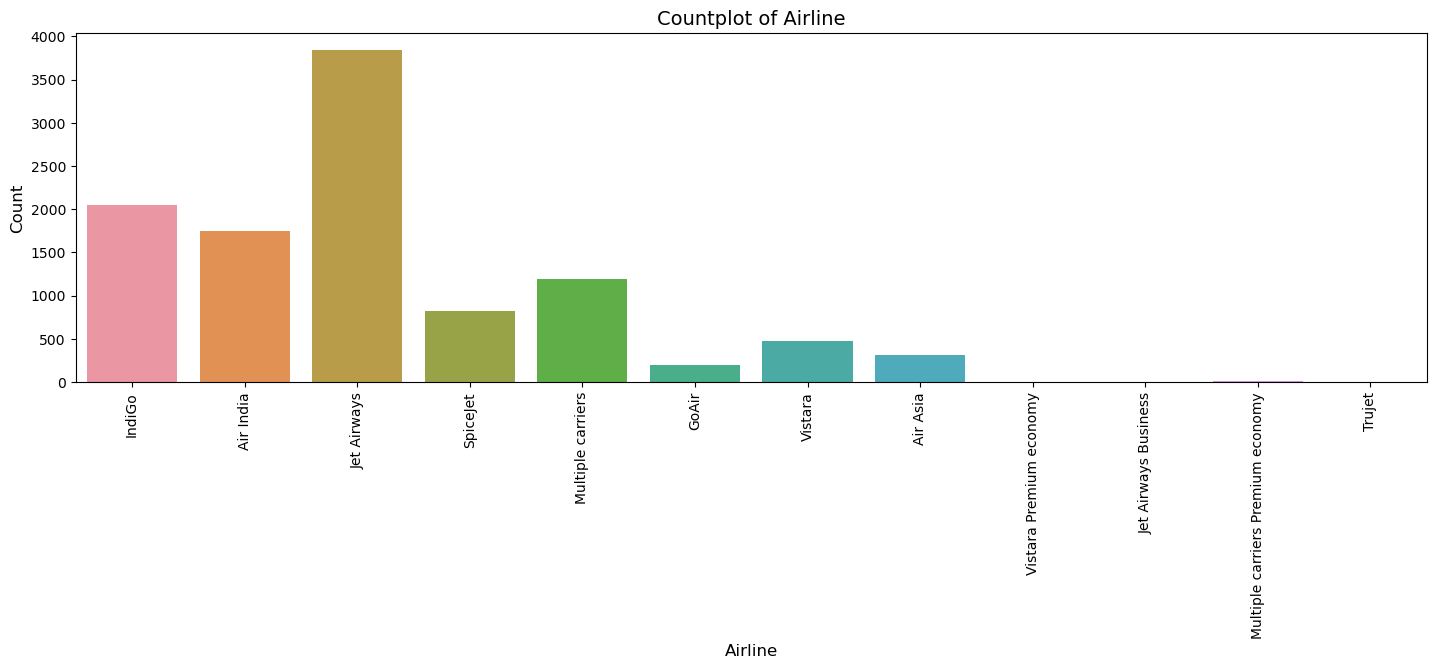

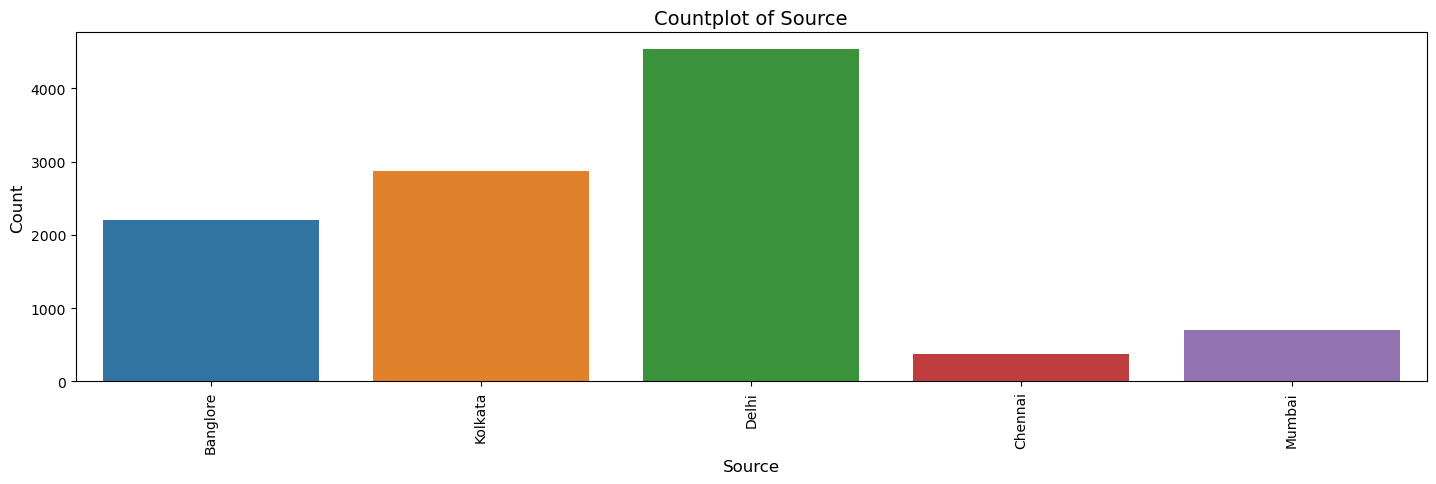

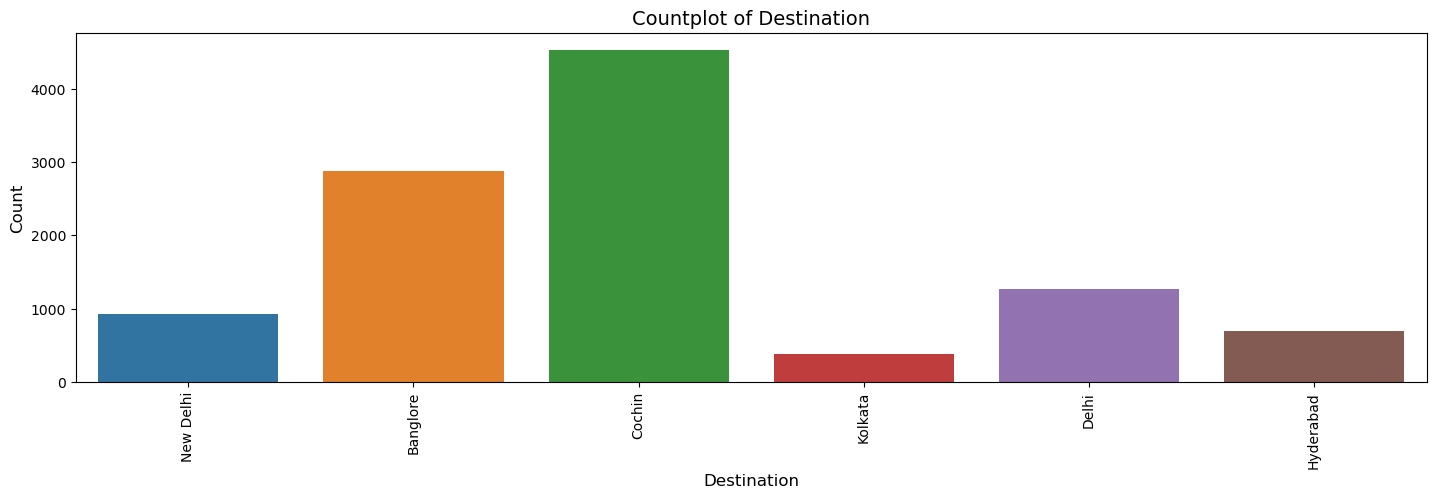

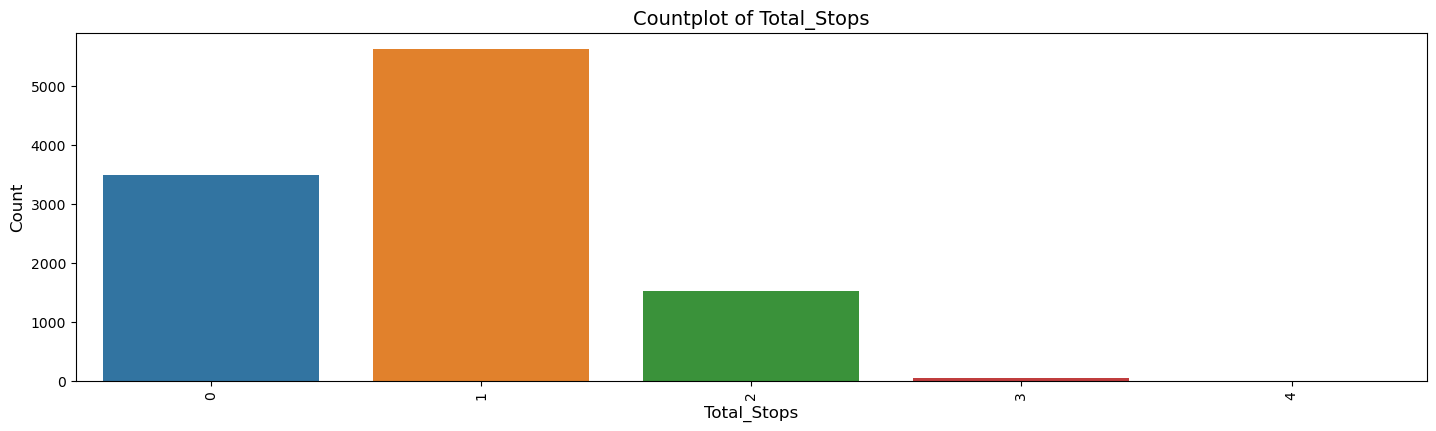

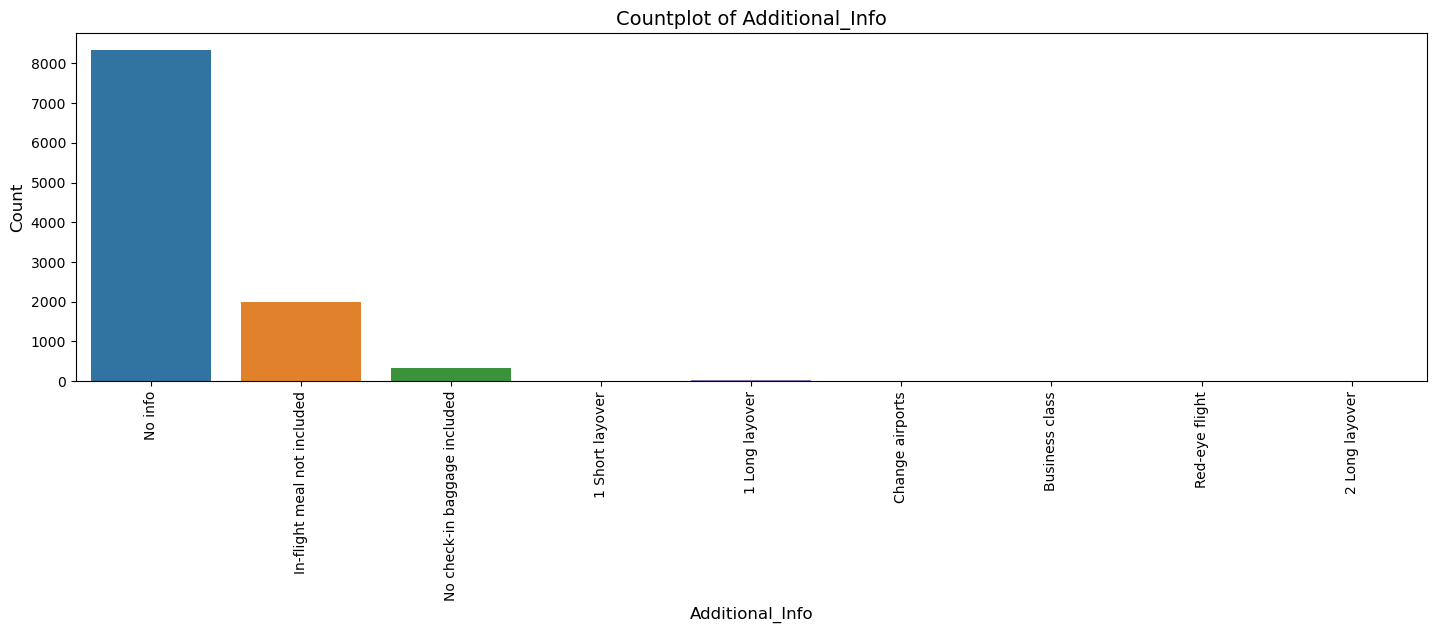

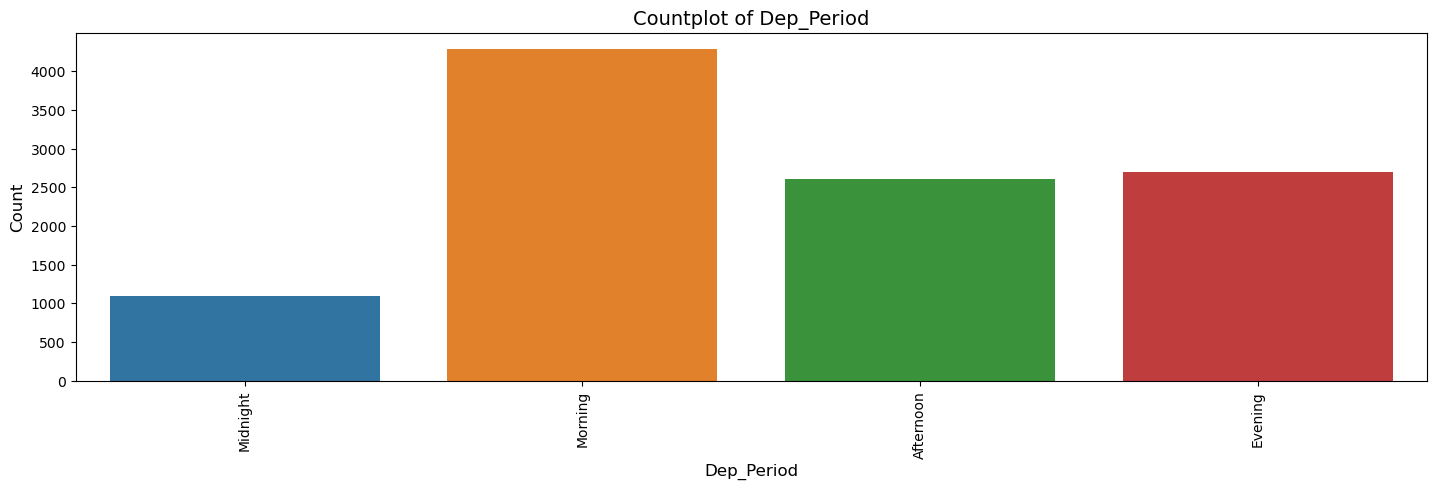

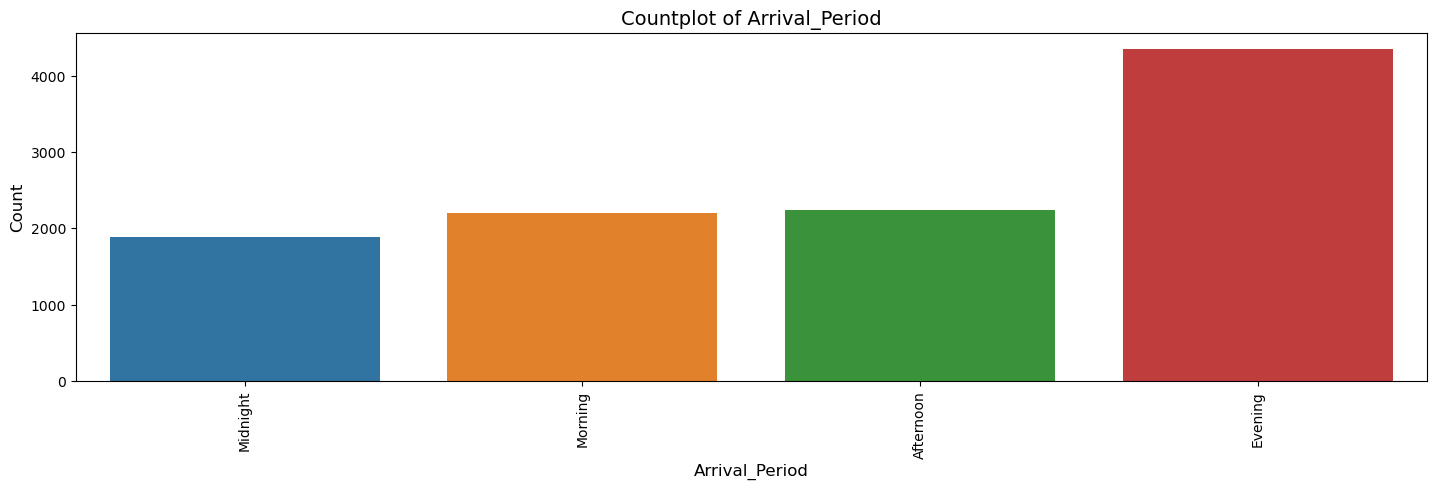

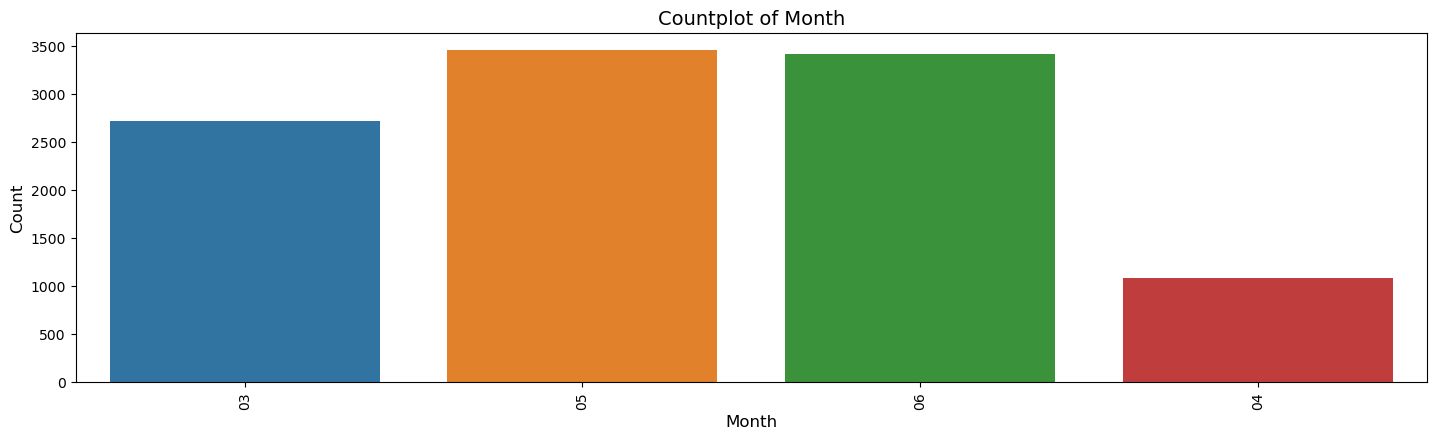

In [130]:
for column in cols:
    plt.figure(figsize=(15, 5))
    sns.countplot(x=column, data=train)
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.title(f'Countplot of {column}', fontsize=14)
    plt.tight_layout(pad = 3.0)
    plt.xticks(rotation = 90)
    plt.show()

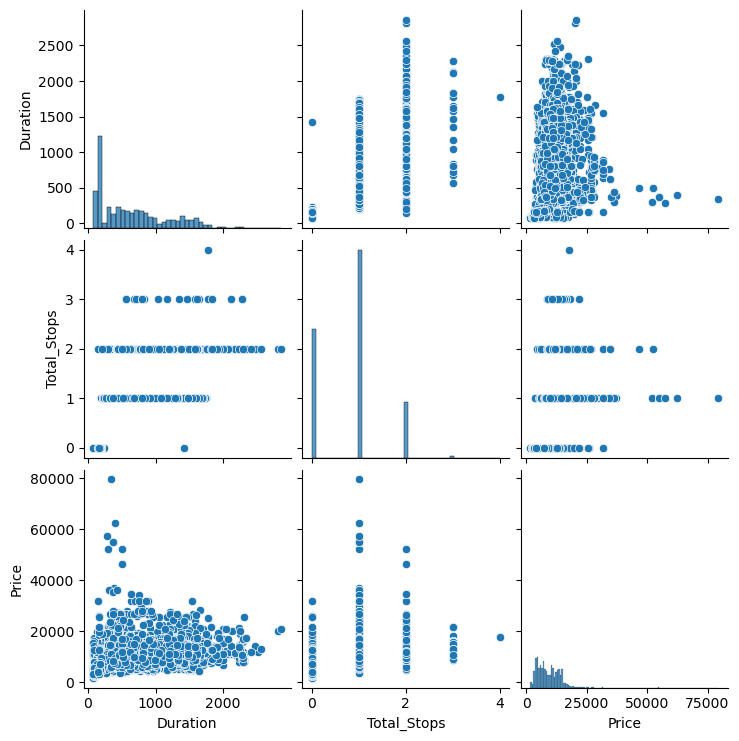

In [131]:
sns.pairplot(train)

In [132]:
train.dtypes

Airline              object
Source               object
Destination          object
Duration            float64
Total_Stops           int64
Additional_Info      object
Price                 int64
Date                 object
Month                object
Year                 object
Dep_Period         category
Arrival_Period     category
dtype: object

In [133]:
train

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Dep_Period,Arrival_Period
0,IndiGo,Banglore,New Delhi,170.0,0,No info,3897,24,03,2019,Evening,Midnight
1,Air India,Kolkata,Banglore,445.0,2,No info,7662,1,05,2019,Midnight,Afternoon
2,Jet Airways,Delhi,Cochin,1140.0,2,No info,13882,9,06,2019,Morning,Midnight
3,IndiGo,Kolkata,Banglore,325.0,1,No info,6218,12,05,2019,Evening,Evening
4,IndiGo,Banglore,New Delhi,285.0,1,No info,13302,1,03,2019,Afternoon,Evening
...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,150.0,0,No info,4107,9,04,2019,Evening,Evening
10679,Air India,Kolkata,Banglore,155.0,0,No info,4145,27,04,2019,Evening,Evening
10680,Jet Airways,Banglore,Delhi,180.0,0,No info,7229,27,04,2019,Morning,Morning
10681,Vistara,Banglore,New Delhi,160.0,0,No info,12648,1,03,2019,Morning,Afternoon


## Outlier Detection and Skewness

<AxesSubplot:xlabel='Duration'>

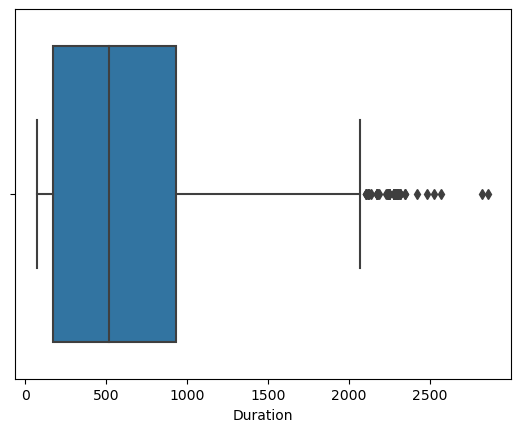

In [134]:
sns.boxplot(x='Duration', data=train)

<AxesSubplot:xlabel='Total_Stops'>

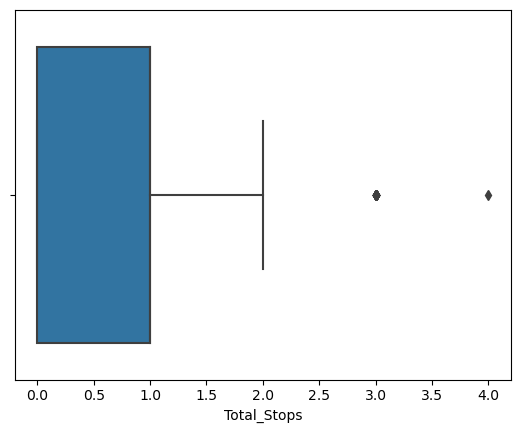

In [135]:
sns.boxplot(x='Total_Stops', data=train)

In [136]:
#cols1 = ['Duration', 'Total_Stops']
#for column in cols:
    #IQR = train[column].quantile(0.75) - train[column].quantile(0.25)
    #Lower_fence = train[column].quantile(0.25) - (IQR * 3)
    #Upper_fence = train[column].quantile(0.75) + (IQR * 3)
    #print(f'{column} outliers are values < {round(Lower_fence,2)} or > {round(Upper_fence,2)}')

In [137]:
# For Duration
# replacing any value lesser than -2.4 with -2.4
# train['Duration'] = np.where(train['Duration'] < -2110.0, -2110.0, train['Duration'])
# replacing any value greater than 3.2 with 3.2
# train['Duration'] = np.where(train['Duration'] > 3210, 3210, train['Duration'])

I have decided not to remove or winsorize the outliers as it didnt improve the models performance.

In [138]:
train.skew()

C:\Users\HP\AppData\Local\Temp\ipykernel_22212\3574648760.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  train.skew()


Duration       0.861697
Total_Stops    0.317513
Price          1.813197
Date           0.118827
Month         -0.387622
Year           0.000000
dtype: float64

In [139]:
train.dtypes

Airline              object
Source               object
Destination          object
Duration            float64
Total_Stops           int64
Additional_Info      object
Price                 int64
Date                 object
Month                object
Year                 object
Dep_Period         category
Arrival_Period     category
dtype: object

In [141]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# the independent variables set
X = train[['Total_Stops', 'Duration']]
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

       feature       VIF
0  Total_Stops  5.111088
1     Duration  5.111088


In [143]:
train.drop(['Total_Stops'], axis=1)
test.drop(['Total_Stops'], axis=1)

,Airline,Source,Destination,Duration,Additional_Info,Date,Month,Year,Dep_Period,Arrival_Period
0,Jet Airways,Delhi,Cochin,655.0,No info,6,06,2019,Afternoon,Midnight
1,IndiGo,Kolkata,Banglore,240.0,No info,12,05,2019,Morning,Morning
2,Jet Airways,Delhi,Cochin,1425.0,In-flight meal not included,21,05,2019,Evening,Evening
3,Multiple carriers,Delhi,Cochin,780.0,No info,21,05,2019,Morning,Evening
4,Air Asia,Banglore,Delhi,170.0,No info,24,06,2019,Evening,Midnight
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,Kolkata,Banglore,1435.0,No info,6,06,2019,Evening,Evening
2667,IndiGo,Kolkata,Banglore,155.0,No info,27,03,2019,Afternoon,Afternoon
2668,Jet Airways,Delhi,Cochin,395.0,No info,6,03,2019,Evening,Midnight
2669,Air India,Delhi,Cochin,915.0,No info,6,03,2019,Midnight,Evening


## Encoding Categorical Columns


In [144]:
cat = train[['Airline', 'Source', 'Destination', 'Additional_Info', 'Dep_Period', 'Arrival_Period']]
#cat_dummy= pd.get_dummies(cat, drop_first=True)

In [56]:
pip install category_encoders

Note: you may need to restart the kernel to use updated packages.


In [146]:
import category_encoders as ce

encoder = ce.OneHotEncoder(cols= cat, handle_unknown='return_nan', return_df=True, use_cat_names=True)

In [147]:
train = encoder.fit_transform(train)

In [148]:
test = encoder.fit_transform(test)

In [149]:
#train = train.drop(['Total_Stops'], axis=1)
#test = test.drop(['Total_Stops'], axis=1)

In [150]:
train

,Airline_IndiGo,Airline_Air India,Airline_Jet Airways,Airline_SpiceJet,Airline_Multiple carriers,Airline_GoAir,Airline_Vistara,Airline_Air Asia,Airline_Vistara Premium economy,Airline_Jet Airways Business,...,Month,Year,Dep_Period_Midnight,Dep_Period_Morning,Dep_Period_Afternoon,Dep_Period_Evening,Arrival_Period_Midnight,Arrival_Period_Morning,Arrival_Period_Afternoon,Arrival_Period_Evening
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,03,2019,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,05,2019,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,06,2019,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,05,2019,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,03,2019,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,04,2019,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
10679,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,04,2019,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
10680,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,04,2019,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
10681,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,03,2019,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [151]:
# The test data has some missing columns compared to the train data. So I am going to add those columns to the test data with zero values.
test['Airline_Trujet'] = 0
test['Additional_Info_1 Short layover'] = 0
test['Additional_Info_2 Long layover'] = 0
test['Additional_Info_Red-eye flight'] = 0

In [152]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10678 entries, 0 to 10682
Data columns (total 46 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Airline_IndiGo                                10678 non-null  float64
 1   Airline_Air India                             10678 non-null  float64
 2   Airline_Jet Airways                           10678 non-null  float64
 3   Airline_SpiceJet                              10678 non-null  float64
 4   Airline_Multiple carriers                     10678 non-null  float64
 5   Airline_GoAir                                 10678 non-null  float64
 6   Airline_Vistara                               10678 non-null  float64
 7   Airline_Air Asia                              10678 non-null  float64
 8   Airline_Vistara Premium economy               10678 non-null  float64
 9   Airline_Jet Airways Business                  10678 non-null 

In [153]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 45 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Airline_Jet Airways                           2671 non-null   float64
 1   Airline_IndiGo                                2671 non-null   float64
 2   Airline_Multiple carriers                     2671 non-null   float64
 3   Airline_Air Asia                              2671 non-null   float64
 4   Airline_Air India                             2671 non-null   float64
 5   Airline_Vistara                               2671 non-null   float64
 6   Airline_SpiceJet                              2671 non-null   float64
 7   Airline_Vistara Premium economy               2671 non-null   float64
 8   Airline_GoAir                                 2671 non-null   float64
 9   Airline_Multiple carriers Premium economy     2671 non-null   f

In [154]:
tr = []
tr.append(train.columns)

In [155]:
tel = []
tel.append(test.columns)

## Validation Split

In [156]:
#train.columns

In [157]:
#test.columns

In [158]:
train = train.sort_index(axis = 1)
test = test.sort_index(axis = 1)

In [159]:
from sklearn.model_selection import train_test_split

features = train.drop('Price', axis=1)
target = train['Price']

X_train, X_val, y_train, y_val = train_test_split(features, target, test_size = 0.3, random_state = 1)

In [160]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
result_train = 1 - np.sqrt(np.square(np.log10(y_pred_train +1) - np.log10(y_train +1)).mean())

y_pred_test = model.predict(X_val)
result_test = 1 - np.sqrt(np.square(np.log10(y_pred_test +1) - np.log10(y_val +1)).mean())

print("Train Result:", result_train)
print("Test Result:", result_test)

Train Result: 0.8857354274987681
Test Result: 0.6369318095468901


In [161]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(random_state = 1234)
model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
result_train = 1 - np.sqrt(np.square(np.log10(y_pred_train +1) - np.log10(y_train +1)).mean())

y_pred_test = model.predict(X_val)
result_test = 1 - np.sqrt(np.square(np.log10(y_pred_test +1) - np.log10(y_val +1)).mean())

print("Train Result:", result_train)
print("Test Result:", result_test)

Train Result: 0.9850741144329398
Test Result: 0.9198771890899424


In [173]:
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor()
model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
result_train = 1 - np.sqrt(np.square(np.log10(y_pred_train +1) - np.log10(y_train +1)).mean())

y_pred_test = model.predict(X_val)
result_test = 1 - np.sqrt(np.square(np.log10(y_pred_test +1) - np.log10(y_val +1)).mean())

print("Train Result:", result_train)
print("Test Result:", result_test)

Train Result: 0.9196582508825412
Test Result: 0.9180505546829166


In [162]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state = 1234)
model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
result_train = 1 - np.sqrt(np.square(np.log10(y_pred_train +1) - np.log10(y_train +1)).mean())

y_pred_test = model.predict(X_val)
result_test = 1 - np.sqrt(np.square(np.log10(y_pred_test +1) - np.log10(y_val +1)).mean())

print("Train Result:", result_train)
print("Test Result:", result_test)

Train Result: 0.9732441660906539
Test Result: 0.9368343638604294


## Feature Selection

In [163]:
from sklearn.feature_selection import RFECV

rfecv = RFECV(estimator = model, step = 1, cv = 5, scoring = 'r2')
rfecv = rfecv.fit(X_train, y_train)

print("The optimal number of features:", rfecv.n_features_)
print("Best features:", X_train.columns[rfecv.support_])

The optimal number of features: 41
Best features: Index(['Additional_Info_1 Long layover', 'Additional_Info_Change airports',
       'Additional_Info_In-flight meal not included',
       'Additional_Info_No check-in baggage included',
       'Additional_Info_No info', 'Additional_Info_Red-eye flight',
       'Airline_Air Asia', 'Airline_Air India', 'Airline_GoAir',
       'Airline_IndiGo', 'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Arrival_Period_Afternoon', 'Arrival_Period_Evening',
       'Arrival_Period_Midnight', 'Arrival_Period_Morning', 'Date',
       'Dep_Period_Afternoon', 'Dep_Period_Evening', 'Dep_Period_Midnight',
       'Dep_Period_Morning', 'Destination_Banglore', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'D

The important features are - Additional_Info, Airline, Arrival Period, Departure Period, Destination, Date, Duration, Month, Source, Total Stops

In [164]:
X_train_selected = rfecv.transform(X_train)
X_val_selected = rfecv.transform(X_val)

model = RandomForestRegressor()
model.fit(X_train_selected, y_train)
y_pred_test = model.predict(X_val_selected)
result_test = 1 - np.sqrt(np.square(np.log10(y_pred_test +1) - np.log10(y_val +1)).mean())
print("Test Result:", result_test)

Test Result: 0.9361310742410307


In [165]:
test_selected = rfecv.transform(test)
test['Price'] = model.predict(test_selected)
test['Price'].to_csv('submission.csv', index=False)

## Hyperparameter Tuning

In [166]:
import optuna

In [167]:
def objective(trial):
    param_space = {
        'n_estimators': trial.suggest_int('n_estimators', 10, 200),
        'max_depth': trial.suggest_int('max_depth', 3, 20),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 20),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10),
        'max_features': trial.suggest_categorical('max_features', ['sqrt', 'auto'])
    }
    rfr = RandomForestRegressor(random_state = 1234, **param_space)
    rfr.fit(X_train, y_train)
    y_pred_test = rfr.predict(X_val)
    return 1 - np.sqrt(np.square(np.log10(y_pred_test +1) - np.log10(y_val +1)).mean())

In [168]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=20)

[I 2023-07-06 00:16:12,997] A new study created in memory with name: no-name-4b39746e-9b82-479d-9364-5169bb3cc0fa
[I 2023-07-06 00:16:15,498] Trial 0 finished with value: 0.9267249356590999 and parameters: {'n_estimators': 185, 'max_depth': 11, 'min_samples_split': 9, 'min_samples_leaf': 6, 'max_features': 'auto'}. Best is trial 0 with value: 0.9267249356590999.
[I 2023-07-06 00:16:15,624] Trial 1 finished with value: 0.9056515436293175 and parameters: {'n_estimators': 19, 'max_depth': 9, 'min_samples_split': 9, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.9267249356590999.
[I 2023-07-06 00:16:17,396] Trial 2 finished with value: 0.9248116006382756 and parameters: {'n_estimators': 132, 'max_depth': 16, 'min_samples_split': 19, 'min_samples_leaf': 9, 'max_features': 'auto'}. Best is trial 0 with value: 0.9267249356590999.
[I 2023-07-06 00:16:17,792] Trial 3 finished with value: 0.8871752690976649 and parameters: {'n_estimators': 132, 'max_depth': 6, 'min

In [169]:
print('Best Parameters:', study.best_params)

Best Parameters: {'n_estimators': 164, 'max_depth': 20, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'auto'}


In [170]:
best_params = study.best_params
rfr_tuned = RandomForestRegressor(**best_params)
rfr_tuned.fit(X_train_selected, y_train)

RandomForestRegressor(max_depth=20, min_samples_leaf=2, min_samples_split=5,
                      n_estimators=164)

In [171]:
#y_pred_train = model.predict(X_train)
#result_train = 1 - np.sqrt(np.square(np.log10(y_pred_train +1) - np.log10(y_train +1)).mean())

y_pred_test = rfr_tuned.predict(X_val_selected)
result_test = 1 - np.sqrt(np.square(np.log10(y_pred_test +1) - np.log10(y_val +1)).mean())
#print("Train Result:", result_train)
print("Test Result:", result_test)

Test Result: 0.9359242486305379
